<a href="https://colab.research.google.com/github/SyedRaza204/Genetic-Algo-and-Hill-climbing/blob/main/Genetic_Algorithm_and_Hill_Climbing_Implementation_Using_Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gentic Algorithm and Hill Climbing Implementation**

This project is based on the implementation of two different optimization algorithms. Here, the input for genetic algorithm is taken from the dataset file column feature as a result it produces range of outputs. However, from these set of outputs, parameters of the best solution is consdiered as the input for Hill Climbing algorithm. Following steps are performed to attain the final output:

1. Data gathering
2. Data cleaning
3. Ordinal encoding
4. Genetic algorithm model building using pyGAD
5. Hill climbing model using NetworkX


In [ ]:
# --Uncomment this if getting error in modeling ---#
#!pip install --upgrade xlrd


# 1. Data gathering

In [ ]:
import pandas as pd
from pathlib import Path
src_file = Path.cwd() /  'ISBSG D&E Repository June 2018 R2 (1).xls'

dataset_df = pd.read_excel(src_file, header=[1],  usecols='B:H') #selecting specific columns from dataset

In [ ]:
display(dataset_df)

,8261 rows,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Rating,Rating,Software Age,Major Grouping,Major Grouping,Major Grouping,Major Grouping
1,Data Quality Rating,UFP rating,Year of Project,Industry Sector,Organisation Type,Application Group,Application Type
2,D,A,1998,Service Industry,Recreation & Personnel Services;,Business Application,Transaction/Production System;
3,B,B,2015,Communication,Telecommunications;,Business Application,Online. eSales;
4,B,B,2016,Communication,Telecom,Business Application,Customer relationship management
...,...,...,...,...,...,...,...
8258,B,A,2010,Communication,Communication,Business Application,Application software
8259,B,A,2009,Government,Government,Infrastructure software,other
8260,B,A,2008,Government,Government,Infrastructure software,Application software
8261,B,A,2010,Communication,Communication,Business Application,Application software


# 2. Data cleaning

In [ ]:
# delete a few specified rows at index values 0
# Note that the index values do not always align to row numbers.
formatted_df = dataset_df.drop(labels=[0], axis=0)
display(formatted_df)

,8261 rows,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
1,Data Quality Rating,UFP rating,Year of Project,Industry Sector,Organisation Type,Application Group,Application Type
2,D,A,1998,Service Industry,Recreation & Personnel Services;,Business Application,Transaction/Production System;
3,B,B,2015,Communication,Telecommunications;,Business Application,Online. eSales;
4,B,B,2016,Communication,Telecom,Business Application,Customer relationship management
5,B,A,1996,Construction,Construction;,Business Application,Stock control & order processing;
...,...,...,...,...,...,...,...
8258,B,A,2010,Communication,Communication,Business Application,Application software
8259,B,A,2009,Government,Government,Infrastructure software,other
8260,B,A,2008,Government,Government,Infrastructure software,Application software
8261,B,A,2010,Communication,Communication,Business Application,Application software


In [ ]:
# Considering row1 as column header
formatted_df.columns = formatted_df.iloc[0]
formatted_df = formatted_df[1:]

In [ ]:
formatted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8261 entries, 2 to 8262
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Data Quality Rating  8261 non-null   object
 1   UFP rating           7567 non-null   object
 2   Year of Project      8260 non-null   object
 3   Industry Sector      6828 non-null   object
 4   Organisation Type    6805 non-null   object
 5   Application Group    5671 non-null   object
 6   Application Type     6140 non-null   object
dtypes: object(7)
memory usage: 516.3+ KB


In [ ]:
# Converting dataframe into csv for better analysis
formatted_df.to_csv('dataset.csv', index=False) 


In [ ]:
# import csv formatted dataset for modeling
data = pd.read_csv('dataset.csv')
display(data)

,Data Quality Rating,UFP rating,Year of Project,Industry Sector,Organisation Type,Application Group,Application Type
0,D,A,1998.0,Service Industry,Recreation & Personnel Services;,Business Application,Transaction/Production System;
1,B,B,2015.0,Communication,Telecommunications;,Business Application,Online. eSales;
2,B,B,2016.0,Communication,Telecom,Business Application,Customer relationship management
3,B,A,1996.0,Construction,Construction;,Business Application,Stock control & order processing;
4,B,A,2002.0,Wholesale & Retail,Billing;,Business Application,Billing;
...,...,...,...,...,...,...,...
8256,B,A,2010.0,Communication,Communication,Business Application,Application software
8257,B,A,2009.0,Government,Government,Infrastructure software,other
8258,B,A,2008.0,Government,Government,Infrastructure software,Application software
8259,B,A,2010.0,Communication,Communication,Business Application,Application software


In [ ]:
# Checking the type for dataset
type(data)

pandas.core.frame.DataFrame

In [ ]:
# Dropping null values from the data
data= data.dropna()

In [ ]:
# Checking overall columns in the dataset
data.columns

Index(['Data Quality Rating', 'UFP rating', 'Year of Project',
       'Industry Sector', 'Organisation Type', 'Application Group',
       'Application Type'],
      dtype='object')

In [ ]:
# Checking unique values in the Industry sector column
data['Industry Sector'].unique()

array(['Service Industry', 'Communication', 'Construction',
       'Wholesale & Retail', nan, 'Insurance', 'Banking',
       'Medical & Health Care', 'Electronics & Computers',
       'Professional Services', 'Manufacturing', 'Financial',
       'Government', 'Utilities', 'Logistics', 'Mining', 'Education',
       'Defence', 'Human resource', 'Estate', 'Food and beverage',
       'Other'], dtype=object)

In [ ]:
# Checking total number of records for each category
data['Application Group'].value_counts()

Business Application                              5039
Real-Time Application                              274
Mathematically-Intensive Application               219
Onshore                                             59
Infrastructure Software                             50
Infrastructure software                             15
Mathematically intensive application                 8
Business                                             5
Business Application; Infrastructure Software;       2
Name: Application Group, dtype: int64

In [ ]:
data['Application Group'].unique()

array(['Business Application', 'Mathematically-Intensive Application',
       'Real-Time Application', 'Infrastructure Software',
       'Infrastructure software', 'Mathematically intensive application',
       'Business Application; Infrastructure Software;'], dtype=object)

# 3. OrdinalEncoder for encoding model feature column

For the purpose of encoding, industry sector feature column is selected since it contains more variation in values then any other column. Therefore, this feature will be encoded first and then passed to model

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
data["industry_sector_code"] = ord_enc.fit_transform(data[["Industry Sector"]])
data[["Industry Sector", "industry_sector_code"]]

,Industry Sector,industry_sector_code
0,Service Industry,17.0
1,Communication,1.0
2,Communication,1.0
3,Construction,2.0
4,Wholesale & Retail,19.0
...,...,...
8256,Communication,1.0
8257,Government,9.0
8258,Government,9.0
8259,Communication,1.0


In [ ]:
data["industry_sector_code"].value_counts()

1.0     1379
11.0     650
13.0     591
9.0      498
7.0      368
0.0      245
17.0     138
19.0     103
18.0      58
5.0       58
16.0      49
12.0      31
14.0      21
2.0       18
3.0       14
10.0      13
15.0      10
4.0        9
6.0        1
8.0        1
Name: industry_sector_code, dtype: int64

In [ ]:
#Remvoing duplicates values
data = data.drop_duplicates('industry_sector_code')
data


,Data Quality Rating,UFP rating,Year of Project,Industry Sector,Organisation Type,Application Group,Application Type,industry_sector_code
0,D,A,1998.0,Service Industry,Recreation & Personnel Services;,Business Application,Transaction/Production System;,17.0
1,B,B,2015.0,Communication,Telecommunications;,Business Application,Online. eSales;,1.0
3,B,A,1996.0,Construction,Construction;,Business Application,Stock control & order processing;,2.0
4,B,A,2002.0,Wholesale & Retail,Billing;,Business Application,Billing;,19.0
8,B,A,2000.0,Insurance,Insurance;,Business Application,Sales contact management;,11.0
17,B,A,2002.0,Professional Services,Sales & Marketing;,Business Application,Trading;,16.0
18,C,B,1998.0,Manufacturing,Manufacturing;,Business Application,Management Information System;,13.0
28,A,B,1994.0,Financial,"Financial, Property & Business Services;",Business Application,Office Information System;,7.0
46,A,A,1998.0,Government,Public Administration;Community Services;Insur...,Business Application,Electronic Data Interchange;,9.0
49,B,A,1994.0,Banking,Banking;,Business Application,Transaction/Production System;,0.0


In [ ]:
# Using list() Function
industry_sector_col_list =  list(data["industry_sector_code"])
print(industry_sector_col_list)

[17.0, 1.0, 2.0, 19.0, 11.0, 16.0, 13.0, 7.0, 9.0, 0.0, 5.0, 18.0, 12.0, 14.0, 10.0, 4.0, 3.0, 15.0, 6.0, 8.0]


# 4.  Genetic Algorithm Model building using pyGAD

In [ ]:
# Installing pygad package
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.3 MB/s 



 Type fun_inp
<class 'list'>
Generation = 1
Fitness    = 4.85622193471038
Change     = 4.85622193471038
Generation = 2
Fitness    = 4.85622193471038
Change     = 0.0
Generation = 3
Fitness    = 4.85622193471038
Change     = 0.0
Generation = 4
Fitness    = 4.85622193471038
Change     = 0.0
Generation = 5
Fitness    = 4.85622193471038
Change     = 0.0
Generation = 6
Fitness    = 4.85622193471038
Change     = 0.0
Generation = 7
Fitness    = 4.85622193471038
Change     = 0.0
Generation = 8
Fitness    = 4.85622193471038
Change     = 0.0
Generation = 9
Fitness    = 4.85622193471038
Change     = 0.0
Generation = 10
Fitness    = 4.85622193471038
Change     = 0.0
Generation = 11
Fitness    = 4.85622193471038
Change     = 0.0
Generation = 12
Fitness    = 9.340385408676905
Change     = 4.484163473966525
Generation = 13
Fitness    = 9.340385408676905
Change     = 0.0
Generation = 14
Fitness    = 9.340385408676905
Change     = 0.0
Generation = 15
Fitness    = 9.340385408676905
Change     = 0.0
Gen

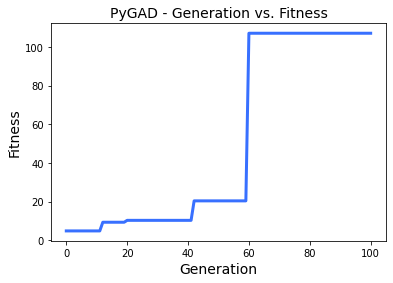

Parameters of the best solution : [-3.64978406 -0.47313828  0.96976265  3.12929157 -1.49077507  1.24131463
 -1.08744986  2.65290353 -3.17196977  0.69357383  0.94726839  2.29574068
  1.51282995  1.53973173 -0.6251425  -3.06538765  3.69422379 -4.61810752
  3.76363825  3.76450189]
Fitness value of the best solution = 107.05907692250462
Index of the best solution : 0
Predicted output based on the best solution : 39.99066036276731
Best fitness value reached after 60 generations.


In [ ]:
import pygad
import numpy

"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

"""Here, we will pass the encoded list for industry sector feature and consider it as input for function """

function_inputs = industry_sector_col_list
print("\n Type fun_inp")
print(type(function_inputs))
desired_output = 40 # Function output.

def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)

last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)




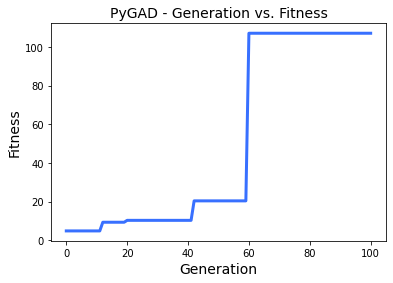

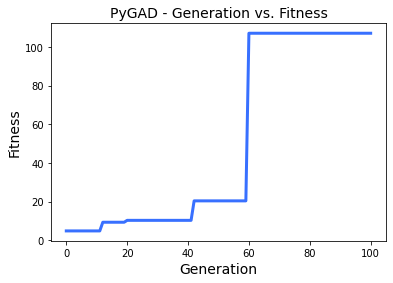

In [ ]:
# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()

# 5. Hill Climbing Model using NetworkX

From genetic algorithm we get the **parameters of the best solution**, **Fitness value of the best solution**, **Predicted output based on the best solution** and the **Best fitness value after specific generations**. Now, for the input for Hill Climbing model, we will consider the best paramaters solution list and convert it in 2D array. This is essential for building cordinate points which is considered as the input for the model.

In [ ]:
# Converting parameters of the best solution list into 2D array
import numpy as np
data_list= [-3.64978406, -0.47313828,  0.96976265,  3.12929157, -1.49077507,  1.24131463,
 -1.08744986,  2.65290353, -3.17196977,  0.69357383,  0.94726839,  2.29574068,
  1.51282995,  1.53973173, -0.6251425,  -3.06538765,  3.69422379, -4.61810752,
  3.76363825,  3.76450189,]
data_list= np.array(data_list).reshape(-1, 2)
data_list

array([[-3.64978406, -0.47313828],
       [ 0.96976265,  3.12929157],
       [-1.49077507,  1.24131463],
       [-1.08744986,  2.65290353],
       [-3.17196977,  0.69357383],
       [ 0.94726839,  2.29574068],
       [ 1.51282995,  1.53973173],
       [-0.6251425 , -3.06538765],
       [ 3.69422379, -4.61810752],
       [ 3.76363825,  3.76450189]])

The solution is 
 [8, 6, 9, 5, 1, 3, 2, 4, 0, 7] 
The path length is 
 28.889900953846272


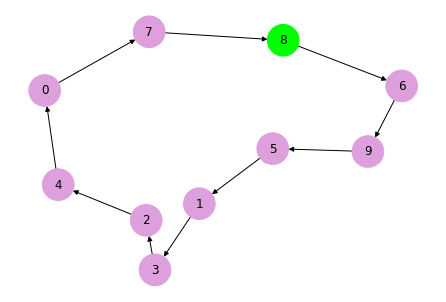

In [ ]:
import random
import numpy as np
import networkx as nx

"""Here, we are passing the 2D array as cordinate points which are extarcted from the output of genetic algorithm """

#coordinate of the points
coordinate= data_list

#adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)) :       
            p = np.linalg.norm(coordinate[i] - coordinate[j])
            matrix.append(p)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))
    #print(matrix)
    return matrix

#finds a random solution    
def solution(matrix):
    points = list(range(0, len(matrix)))
    solution = []
    for i in range(0, len(matrix)):
        random_point = points[random.randint(0, len(points) - 1)]
        solution.append(random_point)
        points.remove(random_point)

    return solution


#computes the path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]]
    return cycle_length

#generate neighbors of the random solution by swapping cities and returns the best neighbor
def neighbors(matrix, solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)
            
    #assume that the first neighbor in the list is the best neighbor      
    best_neighbor = neighbors[0]
    best_path = path_length(matrix, best_neighbor)
    
    #check if there is a better neighbor
    for neighbor in neighbors:
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_path = current_path
            best_neighbor = neighbor
    return best_neighbor, best_path


def hill_climbing(coordinate):
    matrix = generate_matrix(coordinate)
    
    current_solution = solution(matrix)
    current_path = path_length(matrix, current_solution)
    neighbor = neighbors(matrix,current_solution)[0]
    best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    while best_neighbor_path < current_path:
        current_solution = best_neighbor
        current_path = best_neighbor_path
        neighbor = neighbors(matrix, current_solution)[0]
        best_neighbor, best_neighbor_path = neighbors(matrix, neighbor)

    return current_path, current_solution


def graph(coordinate):
    final_solution = hill_climbing(coordinate)
    G = nx.DiGraph()
    temp = final_solution[1]
    G.add_nodes_from(final_solution[1])
    
    for i in range(1, len(final_solution[1])):
        G.add_edge(temp[i - 1], temp[i])
    G.add_edge(temp[len(temp) - 1], temp[0])
    color_map = []
    for node in G:
        if node == final_solution[1][0]:
            color_map.append('lime')
        else: 
            color_map.append('plum')
    nx.draw(G, with_labels = True, node_color = color_map, node_size = 1000)
    print("The solution is \n", final_solution[1], "\nThe path length is \n", final_solution[0])
    return

    
graph(coordinate)